In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from helper import haversine
from sklearn import linear_model

%matplotlib inline

### Read the data files hubway_stations.csv and hubway_trips.csv into separate pandas dataframes.

In [2]:
hubway_stations = pd.read_csv("data/hubway_stations.csv")
hubway_trips = pd.read_csv("data/hubway_trips.csv")

### Get a quick understanding of the columns present in the data and their types.

In [3]:
hubway_stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [4]:
hubway_stations.dtypes

id             int64
terminal      object
station       object
municipal     object
lat          float64
lng          float64
status        object
dtype: object

In [5]:
hubway_stations.describe()

,id,lat,lng
count,142.000000,142.000000,142.000000
mean,74.323944,42.354820,-71.089087
std,41.389098,0.020089,0.027111
min,3.000000,42.309467,-71.146452
25%,39.250000,42.341652,-71.113183
50%,74.500000,42.353373,-71.089191
75%,109.750000,42.366265,-71.065210
max,145.000000,42.404490,-71.035705


In [6]:
hubway_trips.head()

,Unnamed: 0,hubway_id,duration,start_date,strt_statn,end_date,end_statn,zip_code,birth_date,gender
0,426015,482077,675,8/18/2012 19:48:00,8.0,8/18/2012 20:00:00,8.0,'02134,1983.0,Male
1,193080,220612,204,4/26/2012 18:14:00,31.0,4/26/2012 18:17:00,64.0,'02210,1953.0,Male
2,530051,598721,888,9/23/2012 09:26:00,39.0,9/23/2012 09:41:00,39.0,'02118,1985.0,Male
3,484594,547645,526,9/8/2012 12:55:00,88.0,9/8/2012 13:04:00,72.0,'02139,1985.0,Male
4,291265,332163,554,6/21/2012 18:53:00,47.0,6/21/2012 19:02:00,54.0,'02113,1986.0,Female


In [7]:
hubway_trips.dtypes

Unnamed: 0      int64
hubway_id       int64
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
zip_code       object
birth_date    float64
gender         object
dtype: object

In [8]:
hubway_trips.describe()

,Unnamed: 0,hubway_id,duration,strt_statn,end_statn,birth_date
count,210239.000000,210239.000000,2.102390e+05,210239.000000,210239.000000,210239.000000
mean,283491.142771,321401.542806,7.794459e+02,36.727567,36.662261,1976.285594
std,153204.497985,173059.875974,1.349006e+04,18.592716,18.551934,11.002281
min,0.000000,8.000000,0.000000e+00,3.000000,3.000000,1932.000000
25%,153899.000000,174103.000000,3.460000e+02,22.000000,22.000000,1969.000000
50%,280081.000000,319856.000000,5.320000e+02,38.000000,38.000000,1979.000000
75%,414740.000000,469290.000000,8.280000e+02,50.000000,50.000000,1985.000000
max,549285.000000,620312.000000,5.351083e+06,98.000000,98.000000,1995.000000


### Remove all the data points with null values in any one (or more) of the columns.

In [9]:
hubway_stations.dropna(axis=0, inplace=True)
hubway_trips.dropna(axis=0, inplace=True)

### Create a new column age that gives the age of the rider using their birth date.

In [10]:
hubway_trips["age"] = (pd.Timestamp.today().year - hubway_trips["birth_date"].values).astype(int)

### Do you notice any recognizable relationship between any of the columns?
A. The latitude and longitude are directly proportional to each other.

B. The latitude and longitude are inversely proportional to each other.

**C. It is random. There seems to be no relation between the latitude and longitude.**

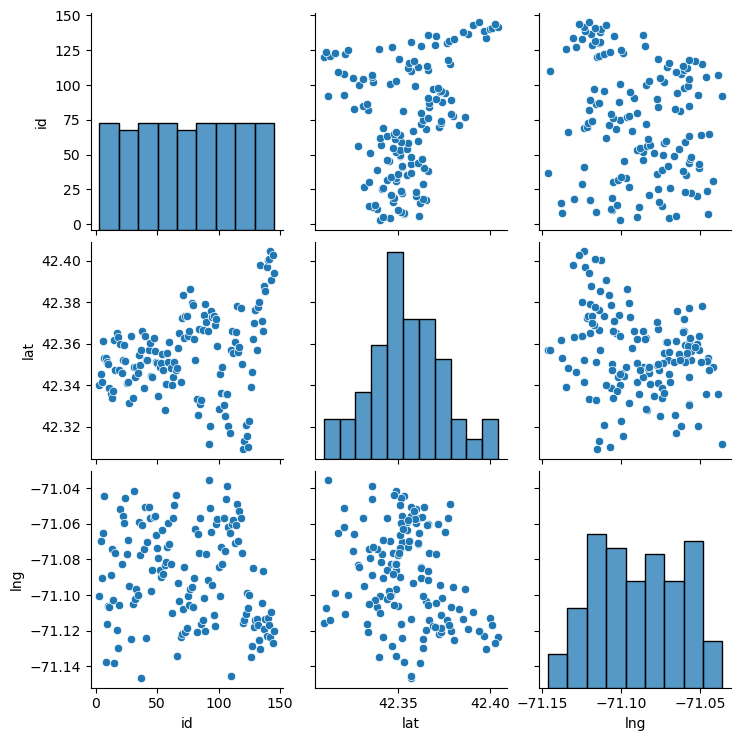

In [11]:
sns.pairplot(hubway_stations)

### Who uses the bikes more, men or women?

A. Women

B. Men

C. Can't say

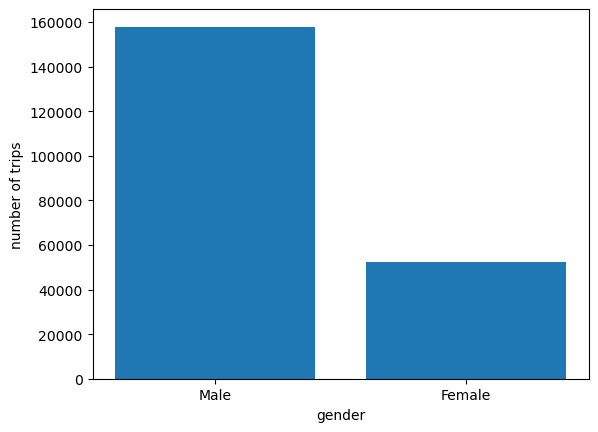

In [12]:
plt.bar(hubway_trips['gender'].value_counts().index, hubway_trips['gender'].value_counts().values)
plt.xlabel("gender")
plt.ylabel("number of trips")
plt.show()

Men bikes more.

### Who uses the bikes more, older or younger people?

A. Older

B. Younger

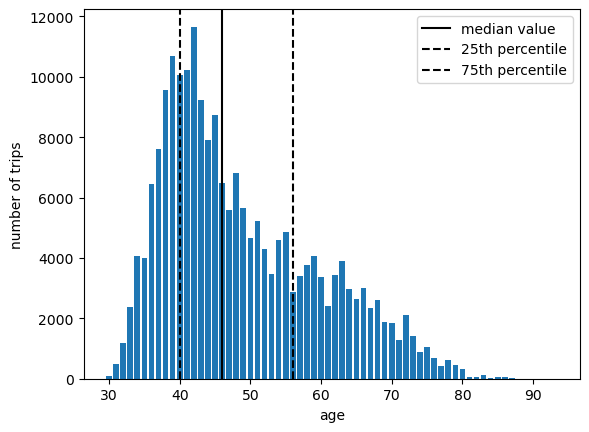

In [13]:
plt.bar(hubway_trips['age'].value_counts().index, hubway_trips['age'].value_counts().values)
plt.axvline(x=hubway_trips['age'].median(), color = "black", label="median value")
plt.axvline(x=hubway_trips['age'].quantile(0.25), color='black', linestyle='--', label='25th percentile')
plt.axvline(x=hubway_trips['age'].quantile(0.75), color='black', linestyle='--', label='75th percentile')
plt.xlabel("age")
plt.ylabel("number of trips")
plt.legend()
plt.show()

Younger people bikes more.

### When is the biggest rush hour?

In [14]:
hubway_trips['start_date'] = pd.to_datetime(hubway_trips['start_date'])
trips_hour = hubway_trips['start_date'].dt.hour

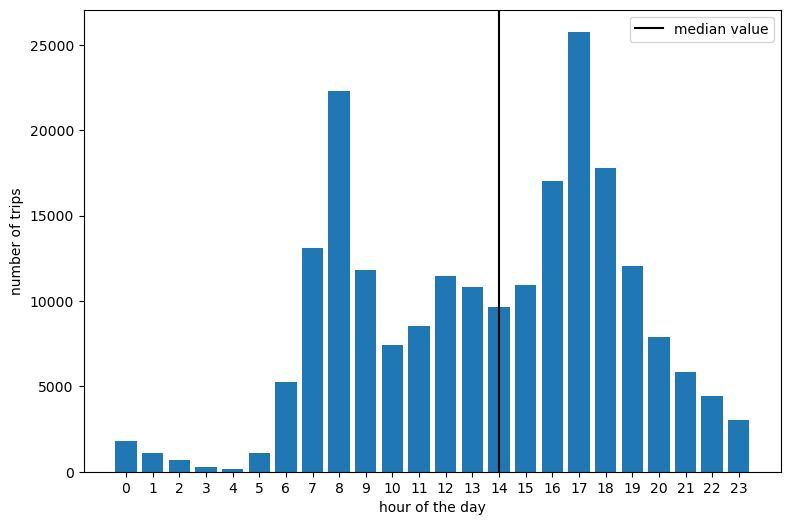

In [15]:
plt.figure(figsize=(9,6))
plt.bar(trips_hour.value_counts().index, trips_hour.value_counts().values)
plt.axvline(x=trips_hour.median(), color = "black", label="median value")
plt.xticks(np.arange(0,24))
plt.xlabel("hour of the day")
plt.ylabel("number of trips")
plt.legend()
plt.show()

Biggest rush hour is at 17 (5PM)

### MORE QUESTIONS

For what reasons are the bikes being used? Recreation, traffic or for health benefits?

Is the usage more during the weekdays or weekends?

Are people using bikes more in Boston or Cambridge?

In [16]:
hubway_trips['start_date']
trips_day_of_week = hubway_trips['start_date'].dt.day_name()
day_counts = trips_day_of_week.value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(ordered_days)

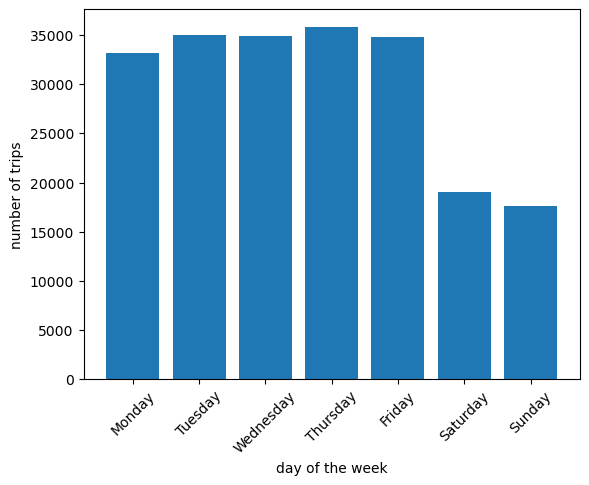

In [17]:
plt.bar(day_counts.index, day_counts.values)
plt.xlabel("day of the week")
plt.ylabel("number of trips")
plt.xticks(rotation=45)
plt.show()

More trips during the weekdays.

In [18]:
hubway_trips['strt_statn'] = hubway_trips['strt_statn'].astype('int64')

In [19]:
hubway_trips_with_municipal = hubway_trips.merge(
                                hubway_stations[['id', 'municipal']],
                                left_on='strt_statn',
                                right_on='id',
                                how='left')

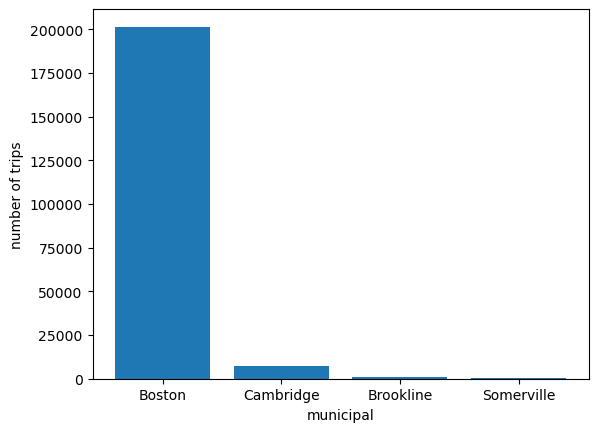

In [20]:
plt.bar(hubway_trips_with_municipal['municipal'].value_counts().index, hubway_trips_with_municipal['municipal'].value_counts().values)
plt.xlabel("municipal")
plt.ylabel("number of trips")
plt.show()

More trips in Boston than in Cambridge

### Create a simple linear model to predict the number of checkouts based on the distance of the bikes from the centre of the city.

In [21]:
checkouts_by_station_id = hubway_trips.groupby('strt_statn').size().reset_index(name='checkouts').rename(columns={'strt_statn': 'id'})

In [22]:
hubway_stations_w_checkouts = checkouts_by_station_id.merge(hubway_stations, on='id', how='left')
hubway_stations_w_checkouts["distance_to_center"] = hubway_stations_w_checkouts.apply(
    lambda row: haversine((row['lng'], row['lat'])), axis=1)

In [23]:
hubway_stations_w_checkouts.head()

,id,checkouts,terminal,station,municipal,lat,lng,status,distance_to_center
0,3,1878,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,2.335706
1,4,3376,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,0.853095
2,5,1913,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,1.802423
3,6,3616,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,0.467803
4,7,1384,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,0.807582


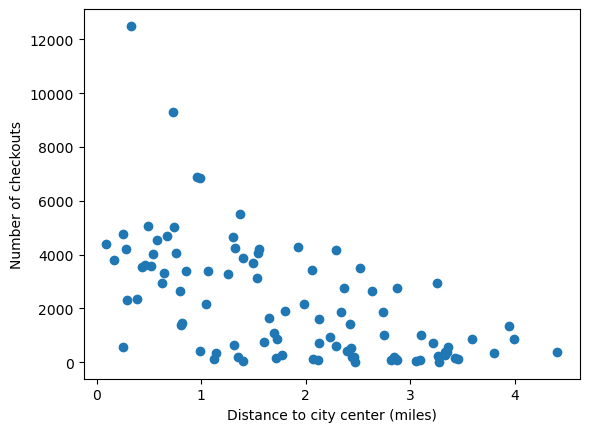

In [24]:
plt.scatter(hubway_stations_w_checkouts.distance_to_center, hubway_stations_w_checkouts.checkouts)
plt.xlabel('Distance to city center (miles)')
plt.ylabel('Number of checkouts')
plt.show()

In [25]:
hubway_stations_w_checkouts = hubway_stations_w_checkouts.dropna(subset=['distance_to_center', 'checkouts'])

In [26]:
model = linear_model.LinearRegression()
model.fit(hubway_stations_w_checkouts[['distance_to_center']], hubway_stations_w_checkouts['checkouts'])

hubway_stations_w_checkouts['predicted_checkouts'] = model.predict(hubway_stations_w_checkouts[['distance_to_center']])

slope = model.coef_[0]
intercept = model.intercept_

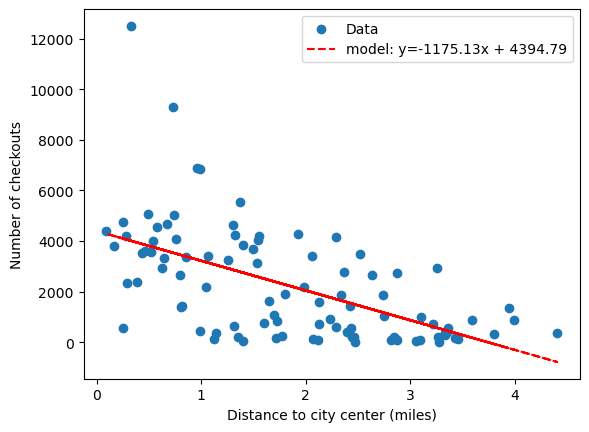

In [27]:
plt.scatter(hubway_stations_w_checkouts.distance_to_center, hubway_stations_w_checkouts.checkouts, label="Data")
plt.plot(
    hubway_stations_w_checkouts.distance_to_center, 
    hubway_stations_w_checkouts.predicted_checkouts, 
    'r--', 
    label=f"model: y={slope:.2f}x + {intercept:.2f}")
plt.xlabel('Distance to city center (miles)')
plt.ylabel('Number of checkouts')
plt.legend()
plt.show()

### Based on our "linear" model, what would most likely be the number of checkouts for a distance of 2.5 miles from the city center?

In [28]:
distance = 2.5
checkout = (slope*distance) + intercept
checkout

1456.9709749016424

Approximately 1457 checkouts for a distance of 2.5 miles from the city center.